In [1]:
'''This project was done to represent the behviour of the Linear regression learning algorithm with model parameters.
   For more project like this, go to:
   LinkedIn: https://www.linkedin.com/in/babey/
   GitHub: https://github.com/mbabeysekera/
'''

In [2]:
import os

In [3]:
curr_dir = os.getcwd() # Get the current directory
print(curr_dir) 

C:\Users\Buddhika Abeysekera\Desktop\Jupyter


In [4]:
file_name = "temp_rain.csv" # File name to be loaded 
file_path = os.path.join(curr_dir, file_name) # Join path name and file name with OS JOIN
print(file_path)

C:\Users\Buddhika Abeysekera\Desktop\Jupyter\temp_rain.csv


In [5]:
# Import NumPy and Pandas
import numpy as np 
import pandas as pd

In [6]:
df = pd.read_csv(file_path) # Upload data with pandas dataframe
df.rename(columns = {'Year': 'YY', 'Temperature - (Celsius)': 'Temp','Month': 
                     'MM','Rainfall - (MM)': 'Rain(mm)'}, inplace = True)
df.head() # print the first 5 rows of the dataframe

,YY,Temp,MM,Rain(mm)
0,1991,25.6446,Jan,190.0050
1,1991,26.1602,Feb,46.0487
2,1991,27.5983,Mar,104.3850
3,1991,28.2959,Apr,93.7386
4,1991,28.8801,May,120.1350


In [7]:
month = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',]) # Create a numpy array with month names
for val in range(0, 12): # loop to replace months with the month number
    df = df.replace(to_replace = month[val], value = val + 1, regex = True)
print(df.head(), '\n') # print the first 5 rows of the dataframe
df.info() # returns the overall details on the dataframe
df.shape

     YY     Temp  MM  Rain(mm)
0  1991  25.6446   1  190.0050
1  1991  26.1602   2   46.0487
2  1991  27.5983   3  104.3850
3  1991  28.2959   4   93.7386
4  1991  28.8801   5  120.1350 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 4 columns):
YY          312 non-null int64
Temp        312 non-null float64
MM          312 non-null int64
Rain(mm)    312 non-null float64
dtypes: float64(2), int64(2)
memory usage: 9.8 KB


(312, 4)

In [8]:
from matplotlib import pyplot as plt

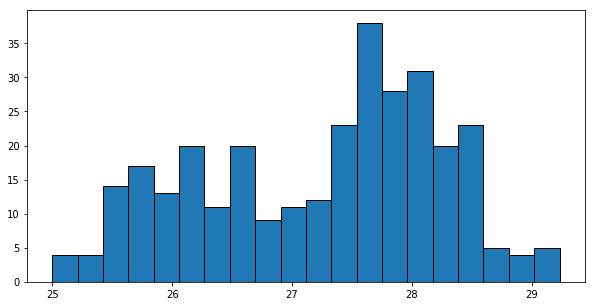

In [9]:
# Histogramic representation of the data
df['Temp'].hist(figsize = (10, 5), bins = 20, linewidth = '1', edgecolor = 'k', grid = False)
plt.show()

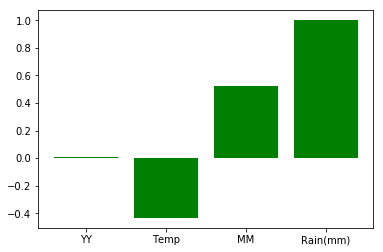

YY          0.004784
Temp       -0.433845
MM          0.522010
Rain(mm)    1.000000
Name: Rain(mm), dtype: float64


In [10]:
# let's try to figure out the correlation of these data
corr = df.corr()['Rain(mm)']
plt.bar(df.columns, corr, color = 'g')
plt.show()
print(corr)

### Year does not have a strong correlation with the rain fall in sri lanka.
### But temperature and Month have a better correlation to rain fall.
### So let's try to develop a model with strong correlations to make a better and acceptable prediction on the rain fall.


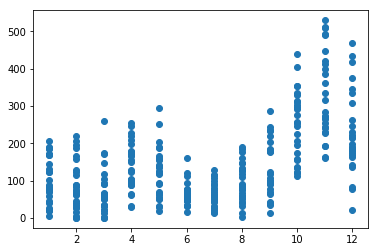

In [11]:
X = df.iloc[:, 2:3] # Get the X set for training
y = df.iloc[:,-1:] # Separate y set for training
plt.scatter(X, y)
plt.show()

In [12]:
# separate training and testing data 
X_train = X.iloc[:-24]
X_test = X.iloc[-24:]
y_train = y.iloc[:-24]
y_test = y.iloc[-24:]

In [13]:
from sklearn.linear_model import LinearRegression # select linear regression as the learning algorithm
regressor = LinearRegression() # Set the model
regressor.fit(X_train, y_train) # train the model with learning algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
y_pred = regressor.predict(X_test) # test your result with testing data set
y_pred

array([[ 48.87777388],
       [ 65.68210285],
       [ 82.48643182],
       [ 99.2907608 ],
       [116.09508977],
       [132.89941874],
       [149.70374772],
       [166.50807669],
       [183.31240566],
       [200.11673463],
       [216.92106361],
       [233.72539258],
       [ 48.87777388],
       [ 65.68210285],
       [ 82.48643182],
       [ 99.2907608 ],
       [116.09508977],
       [132.89941874],
       [149.70374772],
       [166.50807669],
       [183.31240566],
       [200.11673463],
       [216.92106361],
       [233.72539258]])

In [15]:
from sklearn.metrics import r2_score # use R squared value to clarify the results accuracy
r2_score(y_test, y_pred)

0.18249578737640337

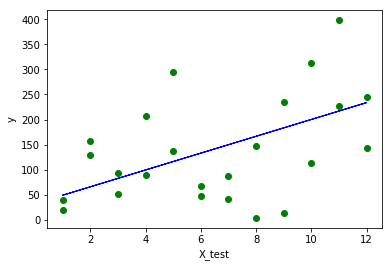

In [16]:
# visualize the model predictions to see the behavior 
plt.scatter(X_test, y_test, color = 'g', linewidth = '1') 
plt.plot(X_test, y_pred, color = 'b', linewidth = '1')
plt.xlabel("X_test")
plt.ylabel("y")
plt.show()

#### Here you see that the accuracy score is really low. Which implies that this model cannot be used to predict the rain fall.

#### Let's try with temperature column along with month to check whether the model going to work or not

In [17]:
# take the values again from dataframe
XX = df.iloc[:, 1: 3] 
yy = df.iloc[:,-1:]

In [18]:
# here sklearn model splitting technique has been used for the test and train data separation
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.2, random_state = 0)

In [19]:
regr = LinearRegression()
regr.fit(XX_train, yy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
yy_pred = regr.predict(XX_test)
print(yy_pred)

[[132.72575021]
 [188.92560434]
 [168.47257855]
 [175.39418514]
 [128.30417546]
 [289.34134011]
 [ 96.88356251]
 [177.13803053]
 [ 81.75676486]
 [152.77028791]
 [ 86.10869619]
 [241.2210933 ]
 [ 92.80234494]
 [239.76148703]
 [120.84465598]
 [164.86197356]
 [140.22218241]
 [198.6396682 ]
 [261.37518308]
 [161.78527718]
 [179.40359394]
 [162.74554446]
 [289.06478313]
 [149.77108029]
 [183.59420038]
 [ 62.82730876]
 [131.50429022]
 [214.42646236]
 [154.9603647 ]
 [131.26948083]
 [194.04574951]
 [104.05867966]
 [111.16198805]
 [ 34.22286687]
 [ 62.49764419]
 [141.85079572]
 [156.52367984]
 [139.28178785]
 [ 67.89685264]
 [257.84908161]
 [112.92437141]
 [158.20155967]
 [ 52.27522445]
 [ 60.87671301]
 [157.79123265]
 [279.49283883]
 [ 71.56958212]
 [ 68.44361922]
 [245.68057457]
 [105.03548278]
 [135.77422434]
 [151.91757056]
 [253.19754688]
 [ 84.76114831]
 [121.07144227]
 [ 75.99449377]
 [113.49618654]
 [ 39.12473847]
 [ 74.64694588]
 [121.48611452]
 [125.9308989 ]
 [217.78355679]
 [114.32

In [21]:
r2_score(yy_test, yy_pred)

0.45570648420983884

#### now, with more input parameters, the accuracy of the model has been increased upto a certain level. 
#### but still the model is not quite predictable because the R value is still less than 50%.